In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import gradio as gr

In [107]:
data = pd.read_csv("C:/Users/siing/Downloads/archive (7)/heart.csv")

In [108]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [111]:
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (1025, 14)


In [81]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [82]:
print(data.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [83]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


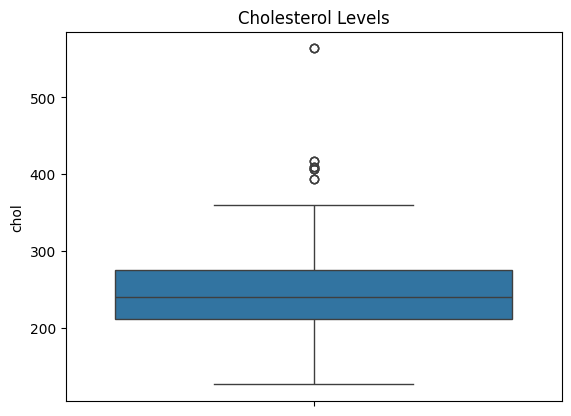

In [84]:
sns.boxplot(data['chol'])
plt.title('Cholesterol Levels')
plt.show()

In [100]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [89]:
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Model Accuracy: 98.05%


In [90]:
train_accuracy = rf_model.score(X_train_scaled, y_train)
print(f"Training Set Accuracy: {train_accuracy * 100:.2f}%")

Training Set Accuracy: 100.00%


In [91]:
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Scores: [0.94444444 0.96527778 0.99300699 0.98601399 0.92307692]
Average Cross-Validation Score: 96.24%


In [73]:
y_pred_rf = rf_model.predict(X_test_scaled)

report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(f"\nConfusion Matrix:\n{conf_matrix}")

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308


Confusion Matrix:
[[159   0]
 [  6 143]]


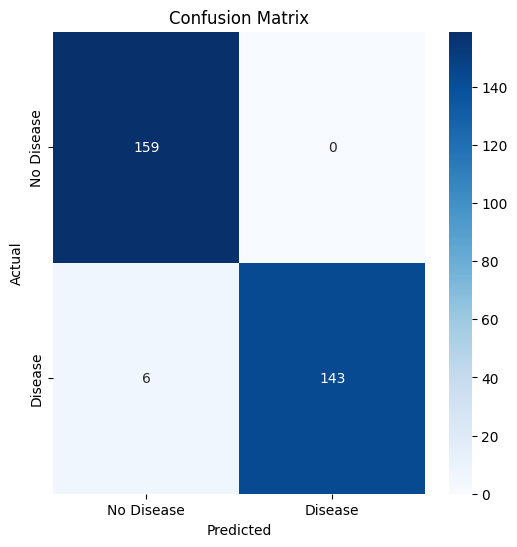

In [72]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [112]:
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    input_data = pd.DataFrame([[
        age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
    ]], columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
    
    input_scaled = scaler.transform(input_data)
    
    prediction = rf_model.predict(input_scaled)
    
    return "Disease Detected" if prediction[0] == 1 else "No Disease Detected"

# Define Gradio interface
inputs = [
    gr.Number(label="Age"),
    gr.Number(label="Sex (0 = Female, 1 = Male)"),
    gr.Number(label="Chest Pain Type (0-3)"),
    gr.Number(label="Resting Blood Pressure (mm Hg)"),
    gr.Number(label="Cholesterol Level (mg/dL)"),
    gr.Number(label="Fasting Blood Sugar (0 = False, 1 = True)"),
    gr.Number(label="Resting ECG Results (0-2)"),
    gr.Number(label="Maximum Heart Rate Achieved"),
    gr.Number(label="Exercise-Induced Angina (0 = No, 1 = Yes)"),
    gr.Number(label="ST Depression Induced by Exercise (Oldpeak)"),
    gr.Number(label="Slope of the Peak Exercise ST Segment (0-2)"),
    gr.Number(label="Number of Major Vessels Colored (0-4)"),
    gr.Number(label="Thalassemia")
]

output = gr.Textbox(label="Prediction Result")

gr_interface = gr.Interface(
    fn=predict_heart_disease,
    inputs=inputs,
    outputs=output,
    title="Heart Health Evaluation System",
    description="Enter the patient's details to predict heart disease risk."
)

gr_interface.launch()

* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
